# CapstoneThree - EDA


## Health Insurance Premium Data

The Price of Health Insurance premium is different for each person.  We have to answer extensive questionnair and talking to agents before we can get a simple quote. 

This dataset contains 1338 rows of Health insurance premium price in the four regions of the US, South West, South East, North West, North East. The data attributes include Age, sex, BIM, Number of Dependents, Smoker/Non-Smoker, and the US region.

I hope to be able to make a good model to predict how much the health insurance premium is going to be depending on the simple criterias and identify the underlying important trends.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from matplotlib import cm
import datetime as dt

In [2]:
# load file prepared in the "Data-Wrangling" stage

df = pd.read_excel('insurance_data.xlsx', index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges,monthly_charge,age_group,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,1407.08,10s,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,143.80,10s,Obese
2,28,male,33.000,3,no,southeast,4449.46200,370.79,20s,Obese
3,33,male,22.705,0,no,northwest,21984.47061,1832.04,30s,Normal
4,32,male,28.880,0,no,northwest,3866.85520,322.24,30s,Overweight


### Basic statistical details and distribution of the numerical attributes

In [3]:
df.describe()

,age,bmi,children,charges,monthly_charge
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,1105.868423
std,14.049960,6.098187,1.205493,12110.011237,1009.167418
min,18.000000,15.960000,0.000000,1121.873900,93.490000
25%,27.000000,26.296250,0.000000,4740.287150,395.027500
50%,39.000000,30.400000,1.000000,9382.033000,781.835000
75%,51.000000,34.693750,2.000000,16639.912515,1386.657500
max,64.000000,53.130000,5.000000,63770.428010,5314.200000


### Observation of the categorical attributes

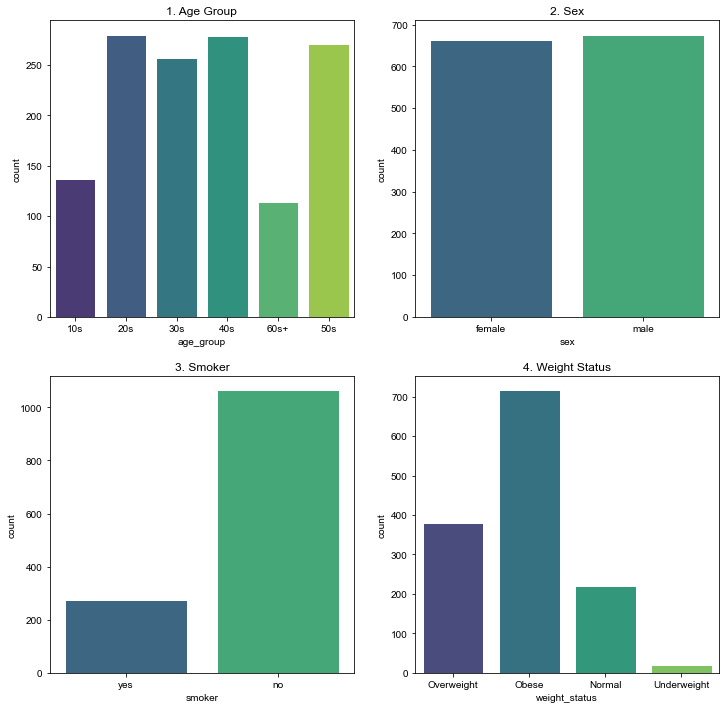

In [4]:
features1 = ['age_group', 'sex', 'smoker', 'weight_status']
labels = ['1. Age Group', '2. Sex', '3. Smoker', '4. Weight Status']
fig1, axes1 = plt.subplots(2,2, figsize = (12,12))
axes1 = axes1.flatten()

for i in range(4): #range(len(features1)):
    order = df[features1[i]].value_counts(ascending=False).index
    sns.set_style("darkgrid")
    axis = sns.countplot(x = df[features1[i]],ax=axes1[i], palette='viridis').set(title=labels[i])



**1. <u>Age Group</u>** - In this dataset, age groups of 10's and 60's are half (or less) of other age groups.  I don't see this to be a show-stopper.<br>
**2. <u>Sex</u>** - Almost the same ratio of male and female.<br>
**3. <u>Smoker</u>** - There are almost four times more non-smokers than smokers.<br>
**4. <u>Weight Status</u>** - Quick observation shows more than half of the people in this dataset are categorized as "obese". 

### How "BMI (Body Mass Index)" is interpreted as the status of your weight.

In [5]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

*CDC Data for BMI standard chart* for reference

**BMI and Corresponding Weight Status**

| BMI | Weight Status |
| --- | --- | 
| Below 18.5 | Underweight |
| 18.5 – 24.9 | Normal |
| 25.0 – 29.9 | Overweight |
| 30.0 and Above | Obese |

Data Source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html


### How much are people paying for their Health Insurnace monthly?

Heath Insurance Monthly Charge

Average: $ 1105.87
Median: $ 781.84


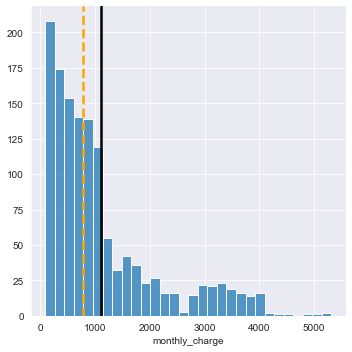

In [6]:
g = sns.displot(data=df, x='monthly_charge')

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'monthly_charge')

print("Heath Insurance Monthly Charge\n")
print("Average: $", round(df['monthly_charge'].mean(),2))
print("Median: $", round(df['monthly_charge'].median(),2))

* For the Health insurance premium monthly fee, people are paying average of **<u>$1,105.87</u>**. 

* Median is **<u>$781.84</u>**.

### Who is more likely to pay higher insurance fee?

In [7]:
# define useful function to create scatterplots of ticket prices against desired columns

#def scatterplots(columns, ncol=None, figsize=()):
def scatterplots(columns, ncol=None):
    x_labels = ['1. Gender', '2. Num of Dependents', '3. Smoker', '4. Region', '5. Age Group', '6. Weight Status']
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15,10), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'monthly_charge', data=df, alpha=0.5)
        ax.set(xlabel=x_labels[i], ylabel='Monthly Charge')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

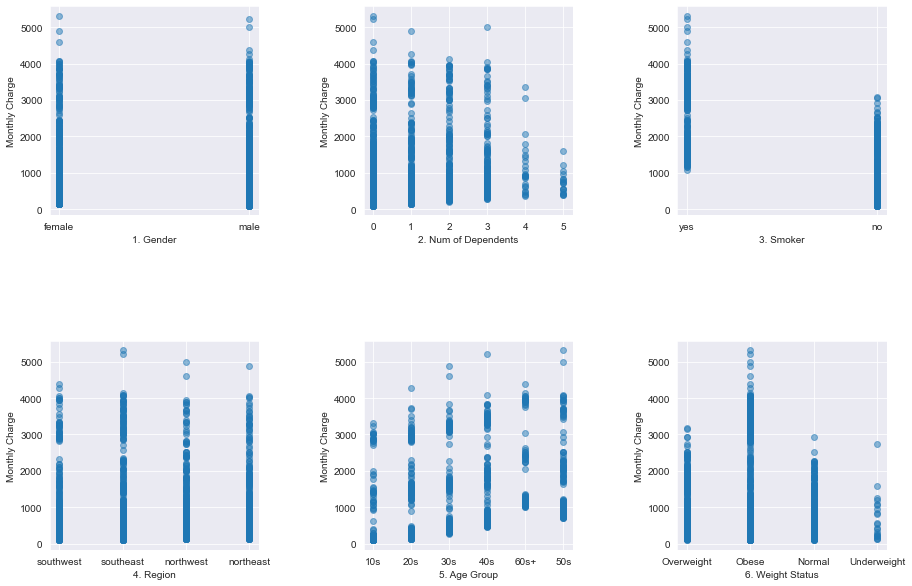

In [8]:
features = [x for x in df.columns if x not in ['age', 'bmi', 'charges', 'monthly_charge']]
scatterplots(features, ncol=3)

**1. <u>Gender</u>** <br>
The distribution of the monthly charge between men and women seems pretty even.

**2. <u>Number of Dependents** <br>
Aside from some outliers, monthly charge for those who have 0 to 2 dependents seem to have similar price range, but the monthly charge starts to drop as you have more than two dependents. This is an interesting trend...  Probably needs further validation.
    
example: https://www.bcbsm.com/index/health-insurance-help/faqs/topics/buying-insurance/family-size-impact-cost.html

**3. <u>Smoker</u>** <br>
As expected, smokers clearly have higher monthly charges.

**4. <u>Region</u>** <br>
There are outliers, but it appears southeast region has slightly higher monthly charges.  We will look into this further.

**5. <u>Age Group</u>** <br>
Also as expected, monthly charge goes up as one gets older.

**6. <u>Weight Status</u>** <br>
Obviously, those that have BMI that is categorized as "Obese" have the highest monthly charge.  Surprisingly, those that are in "Underweight" category seem to pay a lot less than those in "Normal" category.

### Which numeric attribute has the highest correlation?

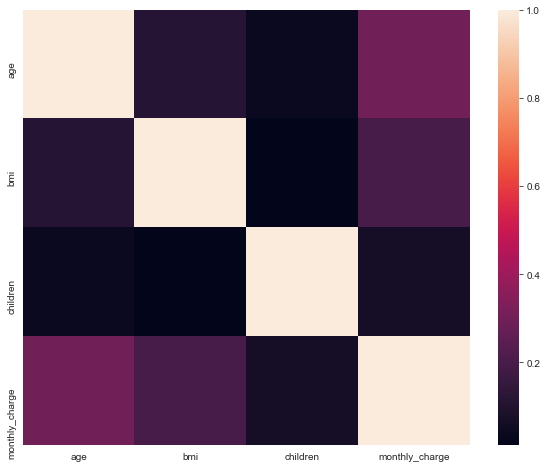

In [15]:
plt.figure(figsize=(10,8))
_ = sns.heatmap(df[['age', 'bmi', 'children', 'monthly_charge']].corr())

### Which numeric attribute has the most linear relationship with the monthly price?

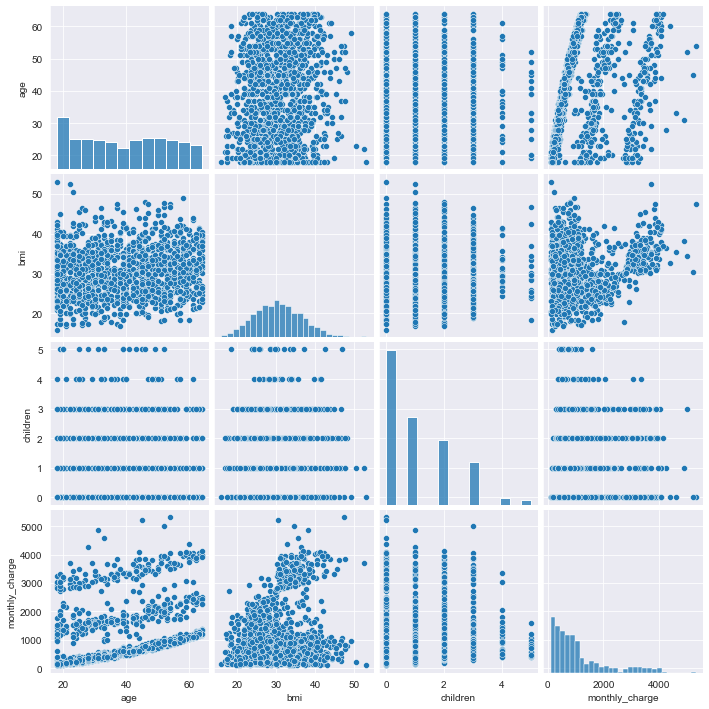

In [9]:
sns.pairplot(df[['age','bmi','children', 'monthly_charge']])
plt.show()

* "age" has the strongest linear association with the monthly charges.<br>
* As was observed in the categorical data observation before, premium goes up as risk goes up.  Risk naturally goes up as people get older.<br>


### Find the trends of the categorical attributes, smoker status, BMI, sex, and region in the price and age chart. 

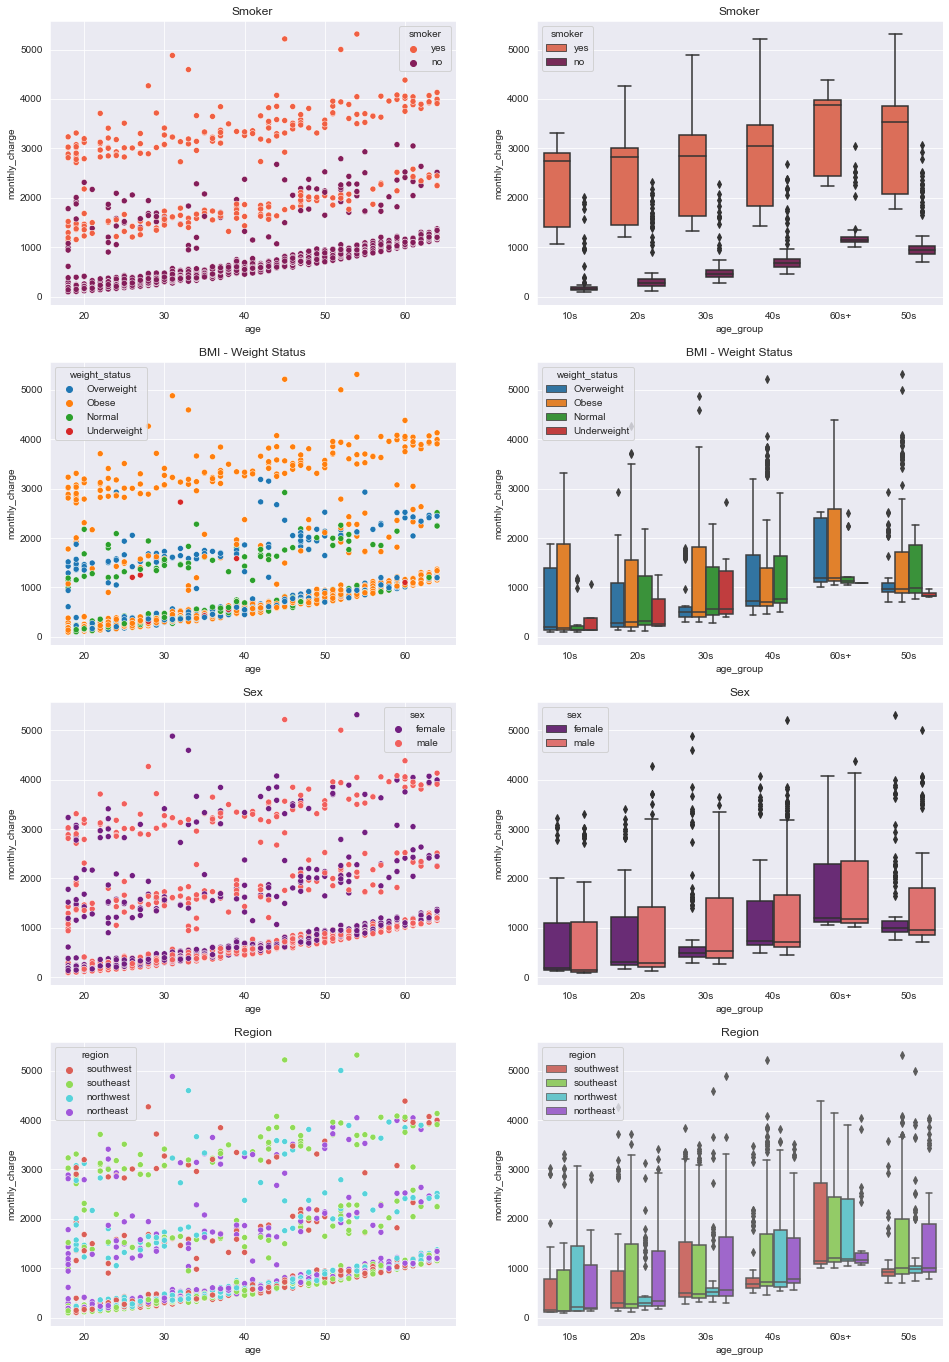

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(16, 24))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 =  axes.flatten()

ax1.set_title('Smoker')
_ = sns.scatterplot(data=df, x="age", y="monthly_charge", hue="smoker", palette="rocket_r", ax=ax1)
ax2.set_title('Smoker')
_ = sns.boxplot(data=df, x="age_group", y="monthly_charge", hue="smoker", palette="rocket_r", ax=ax2)
ax3.set_title('BMI - Weight Status')
_ = sns.scatterplot(data=df, x="age", y="monthly_charge", hue="weight_status", palette="tab10", ax=ax3)
ax4.set_title('BMI - Weight Status')
_ = sns.boxplot(data=df, x="age_group", y="monthly_charge", hue="weight_status", palette="tab10", ax=ax4)
ax5.set_title('Sex')
_ = sns.scatterplot(data=df, x="age", y="monthly_charge", hue="sex", palette="magma", ax=ax5)
ax6.set_title('Sex')
_ = sns.boxplot(data=df, x="age_group", y="monthly_charge", hue="sex", palette="magma", ax=ax6)
ax7.set_title('Region')
_ = sns.scatterplot(data=df, x="age", y="monthly_charge", hue="region", palette="hls", ax=ax7)
ax8.set_title('Region')
_ = sns.boxplot(data=df, x="age_group", y="monthly_charge", hue="region", palette="hls", ax=ax8)


* For each age group, smokers and those in "obese" category are dominant among the higher monthly charge area.

* I do not see an apparent trend for Sex and Region in these charts as they are more scattered. 


### Do sex and region affect the monthly charge?

Monthly Charge by Sex
               mean   median
sex                         
female  1047.464668  784.415
male    1163.062633  780.800


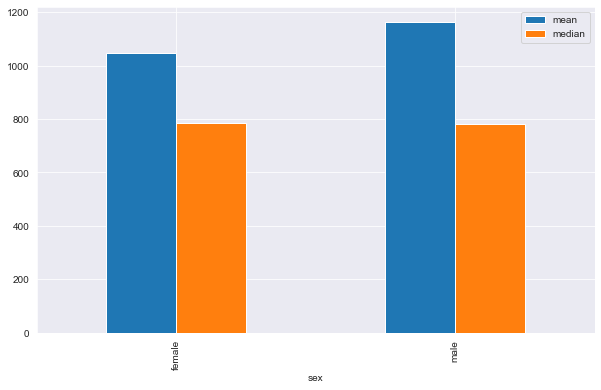

In [11]:
df_sex = df.groupby('sex')['monthly_charge'].agg(['mean', 'median'])

print("Monthly Charge by Sex")
print(df_sex)
_ = df_sex.plot(kind = 'bar', grid = True, figsize = (10, 6))

* Overall average is higher for male. 

Monthly Charge by Region
                  mean  median
region                        
northeast  1117.198457  838.14
northwest  1034.797785  747.15
southeast  1227.950989  774.51
southwest  1028.911415  733.22


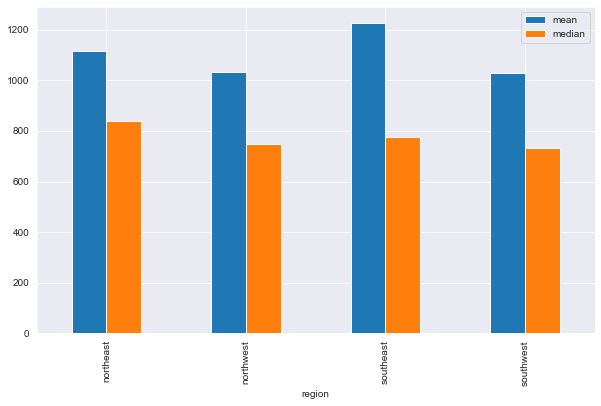

In [12]:
df_region = df.groupby('region')['monthly_charge'].agg(['mean', 'median'])

print("Monthly Charge by Region")
print(df_region)

_ = df_region.plot(kind = 'bar', grid = True, figsize = (10, 6))

* Mean is definitely higher in southeast region.  But it could be due to outliers as median are a lot closer throughout all regions.

### Findings
* As expected, age seems to affect the insurance premium most. Older you get, higher the monthly payment becomes. <br>
* Also expected, whether you smoke or not changes the premium price regardless of the gender. <br> 
* BMI has strong correlation with the prices, too.  
* Majority of those who pay more than $3,000 are both smoker and "obese" status. <br>
* For some reason, "southeast" region and "obese" weight status, seem to have a stronger correlation.<br>
